In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random

#Pandas is built on top of two core Python libraries—matplotlib for data visualization and NumPy for mathematical operations. 
#Pandas acts as a wrapper over these libraries, allowing you to access many of matplotlib's and NumPy's methods with less code.

#Seaborn is a Python data visualization library based on matplotlib

#Python Random module is an in-built module of Python which is used to generate random numbers. 
#These are pseudo-random numbers means these are not truly random. 
#This module can be used to perform random actions such as generating random numbers, 
#print random a value for a list or string, etc.

In [9]:
random.seed(5566)
num_lines = 40428968
sample_size = 2000000
skip = sorted(random.sample(range(1, num_lines), num_lines-sample_size))
skip[0]

# A seed is used to set the starting point for generating a series of random numbers. 
#The seed sets the generator to a random starting point. A unique seed returns a unique random number sequence.

1

In [10]:
df= pd.read_csv("D:\\bdda ctr\\train.csv", header=0, skiprows=skip)

In [11]:
df.shape
#rows,columns

(1999999, 24)

In [12]:
df.columns
#listcolumn names

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [13]:
df["hour"] = pd.to_datetime(df["hour"], format="%y%m%d%H")
#To return hour directly

In [14]:
df.columns
#Column labels

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [15]:
df.head()
#First five headings

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
1,10010730108771379386,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20634,320,50,2374,3,39,-1,23
2,10017325201002992404,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79
3,10018897422996679694,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
4,10024660782388112342,1,2014-10-21,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17614,320,50,1993,2,1063,100083,33


<AxesSubplot:xlabel='click', ylabel='count'>

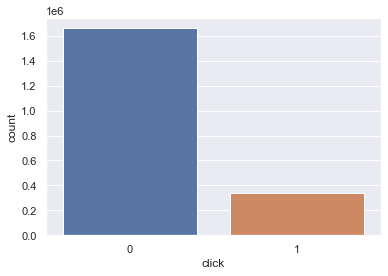

In [16]:
sns.countplot(x='click',data=df)
#plotted if the customer clicked or not

Here we can see that the number of clicks is very less as compared to the number of non clicks

In [17]:
df.dtypes
#defining the types of data

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
dtype: object

# CTR current

In [18]:
df["click"].value_counts() / len(df)
#0 not clicked, 1 is clicked

0    0.830121
1    0.169879
Name: click, dtype: float64

In [19]:
df["hour"].dt.hour
#taking out the hour for each click or non click

0           0
1           0
2           0
3           0
4           0
           ..
1999994    23
1999995    23
1999996    23
1999997    23
1999998    23
Name: hour, Length: 1999999, dtype: int64

In [20]:
df["actual_hour_day"]= df["hour"].dt.hour
#Extracting the actual hour for time series

In [21]:
df.head(2)
#added actual hour day

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,actual_hour_day
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,0,18993,320,50,2161,0,35,-1,157,0
1,10010730108771379386,0,2014-10-21,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,0,20634,320,50,2374,3,39,-1,23,0


In [22]:
imp= df.groupby(['actual_hour_day', 'click']).size().unstack()

#groupby to split two variables for analysis

In [23]:
imp.head()
#no. of clicks and non clicks according to actual hour day

click,0,1
actual_hour_day,,
0,33839,7427
1,39717,9264
2,49735,10310
3,57332,11918
4,79940,15029


[]

<Figure size 432x288 with 0 Axes>

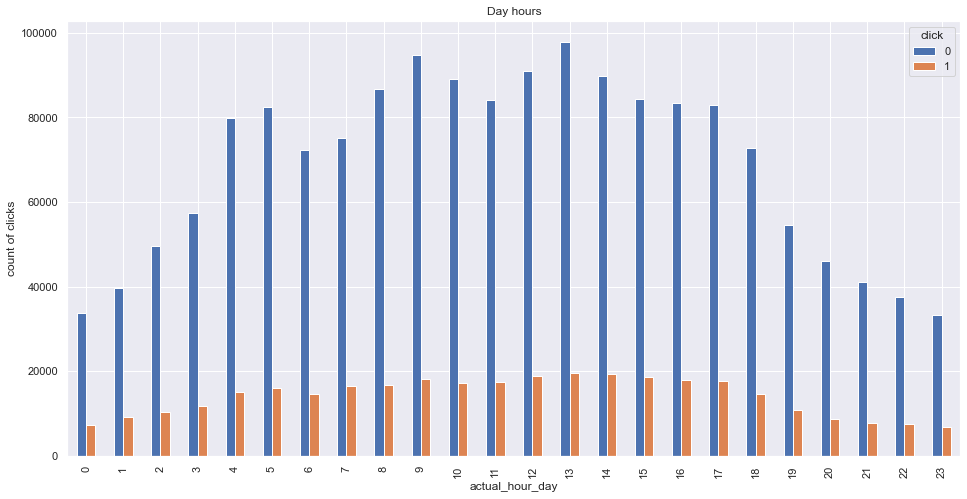

In [24]:
plt.figure()
imp.plot(kind='bar', title="Day hours", figsize=(16,8))
plt.ylabel("count of clicks")
plt.plot()

#Plot hours vs clicks and non clicks

Here we can see the hourly impressions/day and we can clearly see that the rate of clicks is very low as compared to non  clicks

In [25]:
df.groupby('banner_pos')['click'].sum()
#grouping clicks and banner positions

banner_pos
0    236625
1    102223
2        81
3        20
4        84
5        32
7       692
Name: click, dtype: int64

In [26]:
df.groupby('device_type')['click'].sum()
#grouping for device types and cliks

device_type
0     23357
1    312191
2         0
4      3628
5       581
Name: click, dtype: int64

In [27]:
df.banner_pos.unique()

#uniques are returned in order of positions

array([1, 0, 2, 5, 7, 4, 3], dtype=int64)

# CTR with respect to different columns

for C1

In [28]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'actual_hour_day'],
      dtype='object')

In [29]:
df.C1.value_counts()/len(df)
#prob. for unique values in c1

1005    0.918428
1002    0.055203
1010    0.022338
1012    0.002804
1007    0.000870
1001    0.000222
1008    0.000136
Name: C1, dtype: float64

In [30]:
c1= df.C1.unique()
print(c1)

[1005 1002 1010 1007 1008 1012 1001]


In [31]:
ctr_list=[]
for i in c1:
    ctr=df.loc[np.where((df.C1 == i))].click.value_counts() / len(df)
    ctr_list.append(ctr)
    print("C1 values {}:, CTR is {}:".format(i,ctr))
    
    #probability of ctr in descending order according to the unique value in c1

C1 values 1005:, CTR is 0    0.762890
1    0.155538
Name: click, dtype: float64:
C1 values 1002:, CTR is 0    0.043525
1    0.011679
Name: click, dtype: float64:
C1 values 1010:, CTR is 0    0.020233
1    0.002105
Name: click, dtype: float64:
C1 values 1007:, CTR is 0    0.000834
1    0.000037
Name: click, dtype: float64:
C1 values 1008:, CTR is 0    0.000120
1    0.000016
Name: click, dtype: float64:
C1 values 1012:, CTR is 0    0.002308
1    0.000496
Name: click, dtype: float64:
C1 values 1001:, CTR is 0    0.000213
1    0.000009
Name: click, dtype: float64:


FOR banner_pos

In [32]:
df.banner_pos.value_counts() / len(df)

0    0.720299
1    0.277919
7    0.001075
2    0.000330
4    0.000196
5    0.000135
3    0.000046
Name: banner_pos, dtype: float64

In [33]:
banner= df.banner_pos.unique()
print(banner)

[1 0 2 5 7 4 3]


In [34]:
ban_list=[]
for i in banner:
    baa=df.loc[np.where((df.banner_pos == i))].click.value_counts() / len(df)
    ban_list.append(baa)
    print("banner values {}:, banner is {}:".format(i,baa))
    #different prob for differnent banners

banner values 1:, banner is 0    0.226808
1    0.051112
Name: click, dtype: float64:
banner values 0:, banner is 0    0.601987
1    0.118313
Name: click, dtype: float64:
banner values 2:, banner is 0    0.000290
1    0.000041
Name: click, dtype: float64:
banner values 5:, banner is 0    0.000119
1    0.000016
Name: click, dtype: float64:
banner values 7:, banner is 0    0.000729
1    0.000346
Name: click, dtype: float64:
banner values 4:, banner is 0    0.000154
1    0.000042
Name: click, dtype: float64:
banner values 3:, banner is 0    0.000036
1    0.000010
Name: click, dtype: float64:


In [35]:
df.dtypes

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
actual_hour_day              int64
dtype: object

for device_type

In [36]:
df.device_type.value_counts() / len(df)

1    9.224590e-01
0    5.520303e-02
4    1.920851e-02
5    3.129002e-03
2    5.000003e-07
Name: device_type, dtype: float64

In [37]:
dev= df.device_type.unique()
print(dev)

[1 0 4 5 2]


In [38]:
X= df.drop("click", axis=1)

y= df.click

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=12)

In [41]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [42]:
from catboost import CatBoostClassifier

In [43]:
cat_features= ["site_id", "site_domain", "site_category",
              "app_id", "app_domain", "app_category", "device_id", 
              "device_ip", "device_model"]

In [44]:
cat_boost= CatBoostClassifier(learning_rate=0.05, loss_function='Logloss', 
                             random_state=123, iterations=100, eval_metric="Logloss")

In [45]:
cat_boost.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features= cat_features, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6609402	test: 0.6605837	best: 0.6605837 (0)	total: 1.68s	remaining: 2m 46s
1:	learn: 0.6320177	test: 0.6313510	best: 0.6313510 (1)	total: 2.65s	remaining: 2m 9s
2:	learn: 0.6069818	test: 0.6062371	best: 0.6062371 (2)	total: 3.27s	remaining: 1m 45s
3:	learn: 0.5842432	test: 0.5834507	best: 0.5834507 (3)	total: 3.77s	remaining: 1m 30s
4:	learn: 0.5640605	test: 0.5630565	best: 0.5630565 (4)	total: 4.25s	remaining: 1m 20s
5:	learn: 0.5476820	test: 0.5465972	best: 0.5465972 (5)	total: 4.67s	remaining: 1m 13s
6:	learn: 0.5323220	test: 0.5310886	best: 0.5310886 (6)	total: 5.31s	remaining: 1m 10s
7:	learn: 0.5186251	test: 0.5172567	best: 0.5172567 (7)	total: 5.83s	remaining: 1m 7s
8:	learn: 0.5070250	test: 0.5056163	best: 0.5056163 (8)	total: 6.33s	remaining: 1m 3s
9:	learn: 0.4961139	test: 0.4946915	best: 0.4946915 (9)	total: 6.83s	remaining: 1m 1s
10:	learn: 0.4865851	test: 0.4851100	best: 0.4851100 (10)	total: 7.29s	remaining: 59s
11:	learn: 0.4788408	test: 0.4773520	best: 0.477

In [50]:
c= cat_boost.get_feature_importance(prettified=True).sort_index(ascending=True)


In [51]:
c.to_csv("feature_imp.csv")

In [52]:
predictions= cat_boost.predict(X_test, prediction_type="Class", ntree_start=0, ntree_end= cat_boost.get_best_iteration(),thread_count=-1, 
                               verbose=None)

In [53]:
predictions


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
print(c)

          Feature Id  Importances
0            site_id    34.426675
1             app_id    30.065199
2        site_domain    11.042191
3       device_model     4.673463
4                C21     4.134558
5         app_domain     2.116466
6          device_id     2.050874
7          device_ip     1.784473
8      site_category     1.668149
9                C14     1.423609
10               C18     1.238637
11   actual_hour_day     0.874602
12        banner_pos     0.831290
13  device_conn_type     0.805420
14               C19     0.770364
15               C17     0.583256
16               C20     0.545365
17               C16     0.399261
18      app_category     0.286755
19               C15     0.128251
20              hour     0.115336
21                C1     0.028879
22       device_type     0.006927
23                id     0.000000


In [56]:
print(predictions)

[0 0 0 ... 0 0 0]
